In [1]:
using thesis
using Plots
using JLD
using LinearAlgebra
using DataFrames
using StatsPlots
using CSV

In [2]:
# 10 days simulations, c1d0s0
data = JLD.load("fgbuster/result_strip_planck.jld")
labels = ["altitude_offset" "ground_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]

1×7 Matrix{String}:
 "altitude_offset"  "ground_offset"  "fork"  …  "zVAX&ω_180"  "zVAX&ω_270"

In [3]:
ideal = data["ideal"]

Dict{Any, Any} with 18 entries:
  "mask_good" => Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, …
  "nit"       => 13
  "success"   => false
  "x"         => [1.57625, 18.5216, -3.02757, -0.00959544]
  "params"    => ["Dust.beta_d", "Dust.temp", "Synchrotron.beta_pl", "Synchrotr…
  "hess_inv"  => [0.0015703 -0.0643356 0.000103674 0.000954649; -0.0643356 2.66…
  "chi_dB"    => [[-1.6375e30 -1.6375e30 … -1.6375e30 -1.6375e30; -1.6375e30 -1…
  "fun"       => -7.74319e7
  "nfev"      => 16
  "status"    => 2
  "chi"       => [-1.6375e30 -1.6375e30; -1.6375e30 -1.6375e30; … ; -1.6375e30 …
  "Sigma"     => [0.00156191 -0.0641991 0.000176355 0.00105151; -0.0641991 2.66…
  "message"   => "Desired error not necessarily achieved due to precision loss."
  "Sigma_inv" => [86080.5 2072.28 6800.23 -1532.25; 2072.28 50.4168 134.268 -22…
  "jac"       => [-1.75886e-5, -3.4059e-7, -1.2891e-5, 3.01284e-5]
  "invAtNA"   => [0.0885579 -0.892163 -0.546525; -0.892163 12.513 3.56547; -0.5…
  "

In [4]:
scatter(["ideal"], [ideal["x"][3]], yerr = sqrt.(diag(ideal["Sigma"]))[3], legend = false, xrotation = 90, bottom_margin = 6Plots.mm)
for i in labels
    scatter!([i], [data[i]["x"][3]], yerr = sqrt.(diag(data[i]["Sigma"]))[3])
end
yaxis!("Synchrotron spectral index")
savefig("../results/fgbuster/instruments_strip/sync_indx.pdf")

"/mnt/sda1/Università/Magistrale/Tesi/Master-Thesis-Pipeline/results/fgbuster/instruments_strip/sync_indx.pdf"

In [5]:
scatter(["ideal"], [ideal["x"][4]], yerr = sqrt.(diag(ideal["Sigma"]))[3], legend = false, xrotation = 90, bottom_margin = 6Plots.mm)
for i in labels
    scatter!([i], [data[i]["x"][4]], yerr = sqrt.(diag(data[i]["Sigma"]))[3])
end
yaxis!("Synchrotron curvature")
savefig("../results/fgbuster/instruments_strip/sync_curvature.pdf")

"/mnt/sda1/Università/Magistrale/Tesi/Master-Thesis-Pipeline/results/fgbuster/instruments_strip/sync_curvature.pdf"

In [6]:
scatter(["ideal"], [ideal["x"][1]], yerr = sqrt.(diag(ideal["Sigma"]))[1], legend = false, xrotation = 90, bottom_margin = 6Plots.mm)
for i in labels
    scatter!([i], [data[i]["x"][1]], yerr = sqrt.(diag(data[i]["Sigma"]))[1])
end
yaxis!("Dust beta index")
savefig("../results/fgbuster/instruments_strip/dust_indx.pdf")

"/mnt/sda1/Università/Magistrale/Tesi/Master-Thesis-Pipeline/results/fgbuster/instruments_strip/dust_indx.pdf"

In [7]:
scatter(["ideal"], [ideal["x"][2]], yerr = sqrt.(diag(ideal["Sigma"]))[2], legend = false, xrotation = 90, bottom_margin = 6Plots.mm)
for i in labels
    scatter!([i], [data[i]["x"][2]], yerr = sqrt.(diag(data[i]["Sigma"]))[2])
end
yaxis!("Dust temperature [K]")
savefig("../results/fgbuster/instruments_strip/dust_temp.pdf")

"/mnt/sda1/Università/Magistrale/Tesi/Master-Thesis-Pipeline/results/fgbuster/instruments_strip/dust_temp.pdf"

In [8]:
a = get_map_and_hist(ideal, "Q", 64)

((Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}), (Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}))

In [9]:
df = DataFrame(
    ERRORED_ANGLE= [labels...], 
    SYNCRO_INDX = [[ data[i]["x"][3] for i in labels ]...],
    SYNCRO_SIGMA = [[ sqrt.(diag(data[i]["Sigma"]))[3] for i in labels] ... ],
    DUST_INDX = [[ data[i]["x"][1] for i in labels ]...],
    DUST_SIGMA = [[ sqrt.(diag(data[i]["Sigma"]))[1] for i in labels] ... ],
    DUST_T_INDX = [[ data[i]["x"][2] for i in labels ]...],
    DUST_T_SIGMA = [[ sqrt.(diag(data[i]["Sigma"]))[2] for i in labels] ... ]
   
)
#CSV.write("../results/fgbuster/instruments_all/fitted_param.csv", df)
#CSV.write("../results/fgbuster/instruments_strip/fitted_param.csv", df)

Row,ERRORED_ANGLE,SYNCRO_INDX,SYNCRO_SIGMA,DUST_INDX,DUST_SIGMA,DUST_T_INDX,DUST_T_SIGMA
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,altitude_offset,-3.11237,0.0476975,1.58385,0.0394481,18.2514,1.58104
2,ground_offset,-3.11218,0.0476833,1.58408,0.039447,18.2427,1.57938
3,fork,-3.11222,0.0476854,1.58419,0.0394441,18.2384,1.57848
4,zVAX&ω_0,-3.11219,0.0476837,1.58411,0.0394463,18.2416,1.57915
5,zVAX&ω_90,-3.11219,0.0476837,1.58411,0.0394463,18.2416,1.57914
6,zVAX&ω_180,-3.11219,0.0476837,1.58411,0.0394463,18.2416,1.57914
7,zVAX&ω_270,-3.11219,0.0476837,1.58411,0.0394463,18.2416,1.57915


In [10]:
a = @df df scatter(:ERRORED_ANGLE, :SYNCRO_INDX, xrotation = 45, label = "Errored value", formatter = :plain)
#a = hline!([ideal["x"][3]], style=:dash, label = "Ideal value")
a = ylabel!("Synchrotron spectral index")
nothing

In [11]:
b = @df df scatter(:ERRORED_ANGLE, :DUST_INDX, xrotation=45, label = "Errored value", formatter = :plain)
#b = hline!([ideal["x"][1]], style=:dash, label = "Ideal value")
b = ylabel!("Dust (m.b.b.) spectral index")
nothing

In [12]:
c = @df df scatter(:ERRORED_ANGLE, :DUST_T_INDX, xrotation=45, label = "Errored value")
#c = hline!([ideal["x"][2]], style=:dash, label = "Ideal value")
c =ylabel!("Dust temperature [K]")
nothing

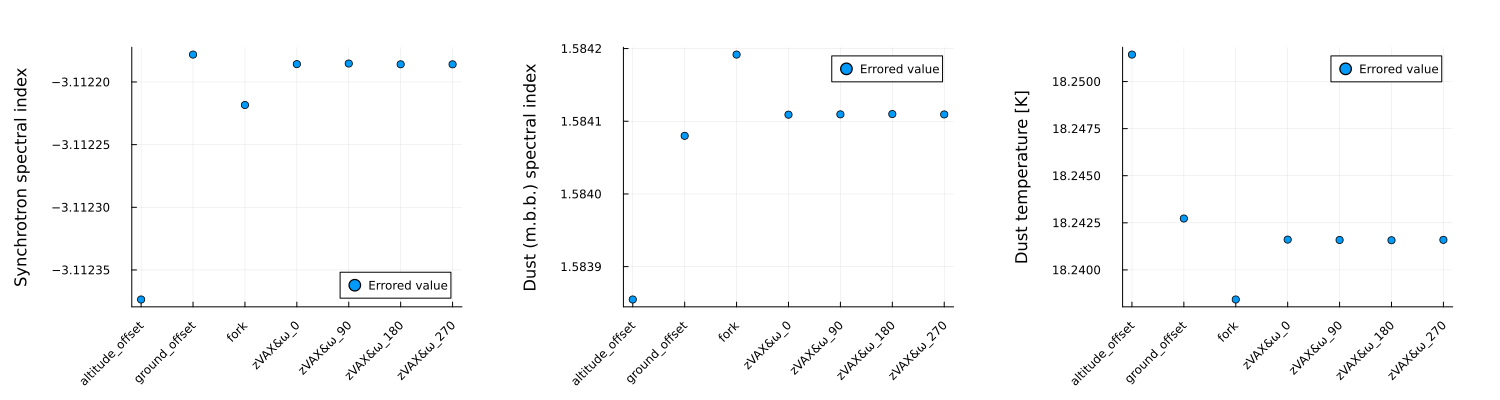

In [13]:
plot(a,b,c, layout = (1,3), size = (1500, 400), bottom_margin = 15Plots.mm, margin=10Plots.mm)
#savefig("../results/fgbuster/instruments_all/fitted_param_plot.pdf")
#savefig("../results/fgbuster/instruments_strip/fitted_param_plot.svg")